<a href="https://colab.research.google.com/github/AntonioFialhoSN/Rede-Neurais-Avalia-o-P3-Parte1/blob/main/Rede_Neurais_Avalia%C3%A7%C3%A3o_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados (AED)

In [3]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

# Survival (Sobrevivência):0 = Não 1 = Sim

# Pclass (Classe do passageiro): Proxy para status socioeconômico (NSE) 1ª = Classe alta 2ª = Classe média 3ª = Classe baixa

# sibsp (Número de irmãos/cônjuges a bordo): Irmãos = irmão, irmã, meio-irmão, meia-irmã Cônjuge = marido, esposa (amantes e noivos foram ignorados)

# parch (Número de pais/filhos a bordo): Pais = mãe, pai Filhos = filha, filho, enteada, enteado Algumas crianças viajaram apenas com babá, portanto parch=0 para elas.

# Ticket (Número do bilhete): Número do bilhete

# Fare (Tarifa): Valor pago pela passagem

# Cabin (Cabine):Número da cabine

# Embarked (Porto de embarque): C = Cherbourg Q = Queenstown S = Southampton

# Name (Nome), Sex (Sexo), Age (Idade): Autoexplicativos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
survival_rate = df['Survived'].mean()
print(f"Taxa geral de sobrevivência: {survival_rate:.2%}")

Taxa geral de sobrevivência: 38.38%


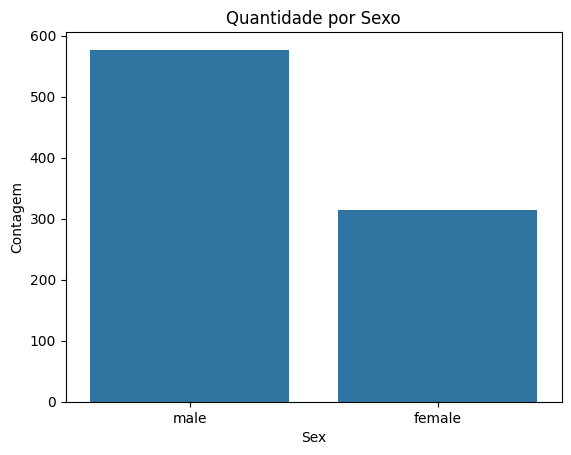

In [ ]:
sns.countplot(x='Sex', data=df)
plt.title('Quantidade por Sexo')
plt.ylabel('Contagem')
plt.show()

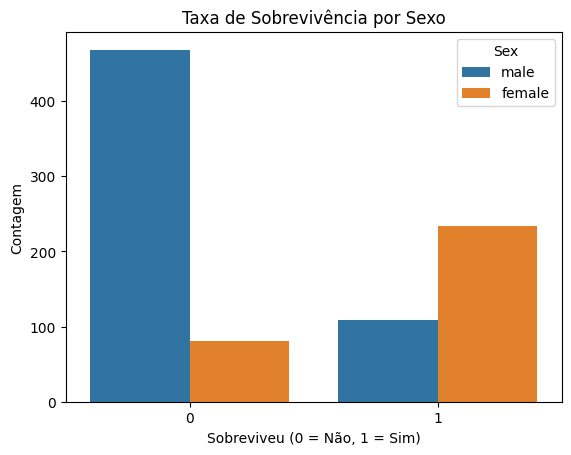

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Taxa de Sobrevivência por Sexo')
plt.xlabel('Sobreviveu (0 = Não, 1 = Sim)')
plt.ylabel('Contagem')
plt.show()

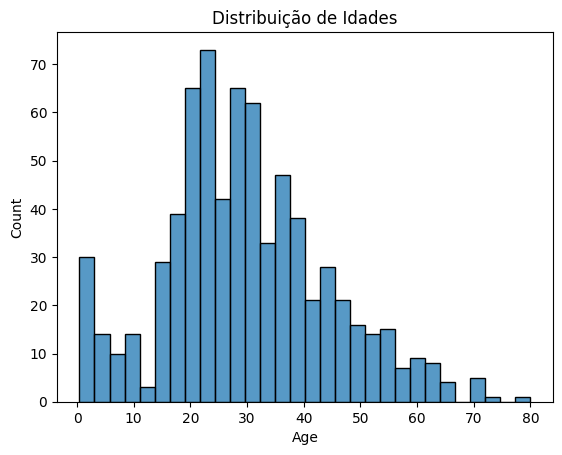

In [ ]:
sns.histplot(df['Age'].dropna(), bins=30)
plt.title('Distribuição de Idades')
plt.show()

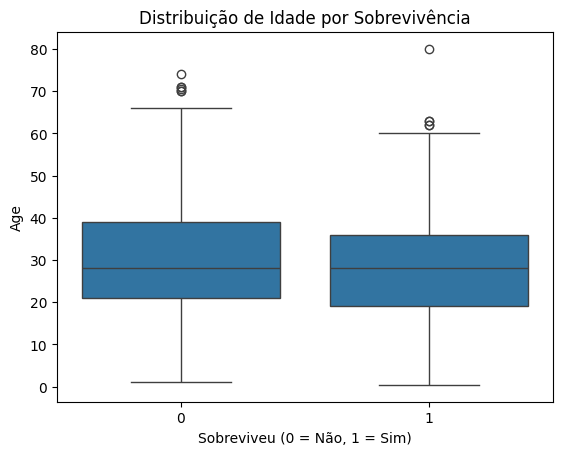

In [ ]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Distribuição de Idade por Sobrevivência')
plt.xlabel('Sobreviveu (0 = Não, 1 = Sim)')
plt.show()

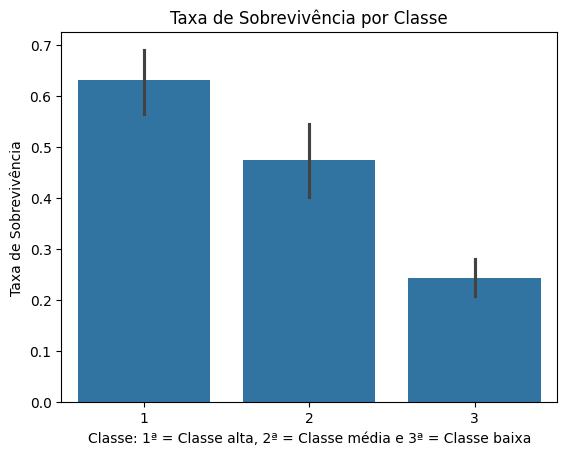

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Taxa de Sobrevivência por Classe')
plt.xlabel('Classe: 1ª = Classe alta, 2ª = Classe média e 3ª = Classe baixa')
plt.ylabel('Taxa de Sobrevivência')
plt.show()

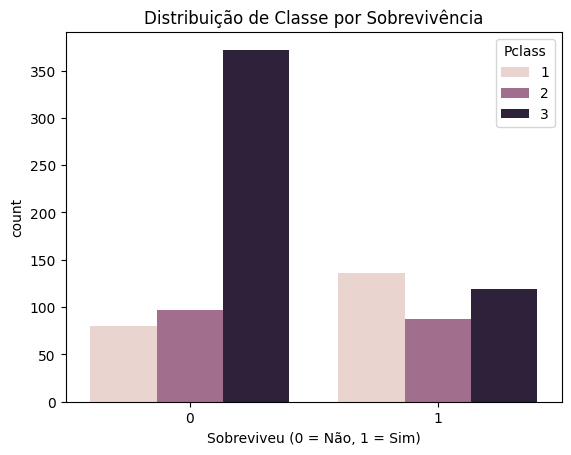

In [ ]:
sns.countplot(x="Survived", hue = 'Pclass', data=df)
plt.title('Distribuição de Classe por Sobrevivência')
plt.xlabel('Sobreviveu (0 = Não, 1 = Sim)')
plt.show()

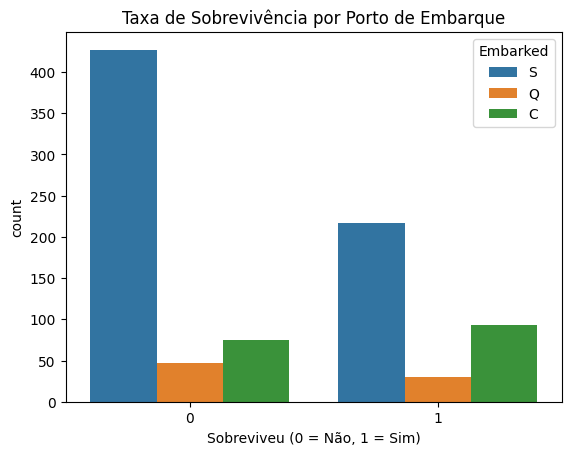

In [ ]:
sns.countplot(x='Survived', hue = 'Embarked', data = df)
plt.title('Taxa de Sobrevivência por Porto de Embarque')
plt.xlabel('Sobreviveu (0 = Não, 1 = Sim)')
plt.show()
# Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

## Limpeza de Dados

In [5]:
total_duplicados = df.duplicated().sum()
print(f"Total de linhas duplicadas: {total_duplicados}")

Total de linhas duplicadas: 0


In [6]:
total_valores_faltantes = df.isnull().sum()
print(f"Total de valores faltantes por coluna:\n{total_valores_faltantes}")

Total de valores faltantes por coluna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
df_1 = df
df_1['Sex'] = df_1['Sex'].map({'male': 0, 'female': 1})
df_1 = df_1.drop(['PassengerId', 'Cabin'], axis=1)
df_2 = df_1
df_2['Embarked'] = df_2['Embarked'].fillna('S')
df_2['Embarked'] = df_2['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_2 = df_2.drop(['Ticket'], axis=1)

df_2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,2


In [8]:
df_2['Name'].str.extract(' ([A-Za-z]+)\.', expand=False).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

/tmp/ipython-input-9-3034418037.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=title_counts.index, y=title_counts.values, palette='viridis')


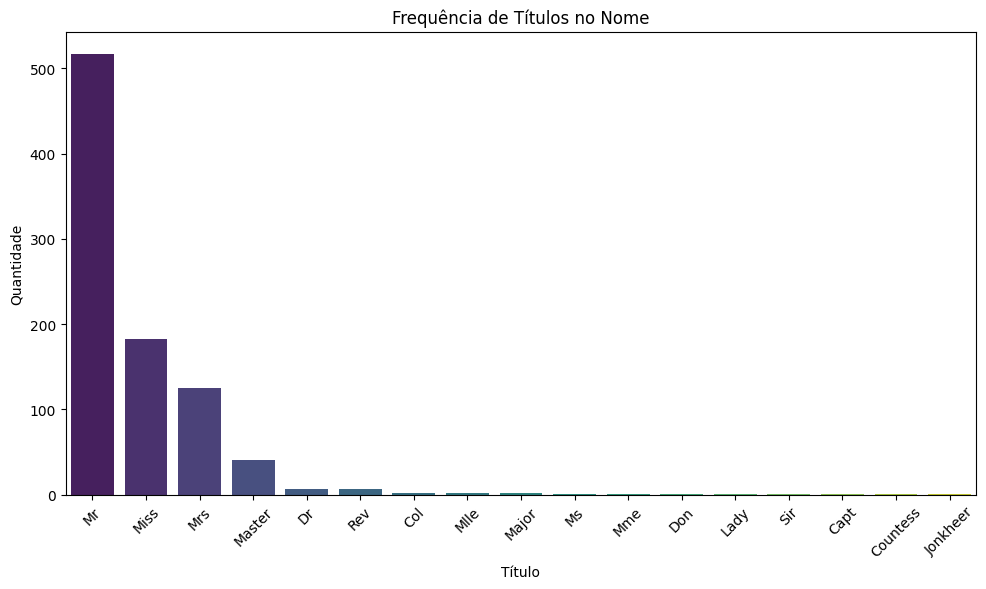

In [9]:
df_2['Title'] = df_2['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# Contagem dos títulos
title_counts = df_2['Title'].value_counts()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=title_counts.index, y=title_counts.values, palette='viridis')
plt.xlabel('Título')
plt.ylabel('Quantidade')
plt.title('Frequência de Títulos no Nome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
least_occuring = ['Don', 'Rev', 'Dr', 'Mme', 'Ms',
                  'Major', 'Lady', 'Sir', 'Mlle', 'Col',
                  'Capt', 'Countess', 'Jonkheer']

df_2['Title'] = df_2['Title'].replace(least_occuring, 'Rare')

In [11]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df_2['Title'] = df_2['Title'].map(title_mapping)
df_2.drop('Name', axis=1, inplace=True)

In [12]:
df_2['Title'].unique()

array([1, 3, 2, 4, 5])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
 8   Title     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


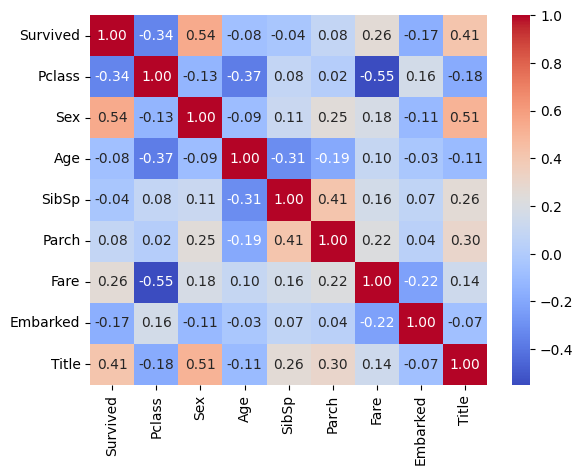

In [13]:
df_2.info()
corr_train = df_2.corr()
sns.heatmap(corr_train, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [14]:
df_3 = df_2
df_3['Age'] = df_3['Age'].fillna(df_3['Age'].mean())
df_3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,2,1
1,1,1,1,38.0,1,0,71.2833,0,3
2,1,3,1,26.0,0,0,7.9250,2,2
3,1,1,1,35.0,1,0,53.1000,2,3
4,0,3,0,35.0,0,0,8.0500,2,1


#Normalização de Dados



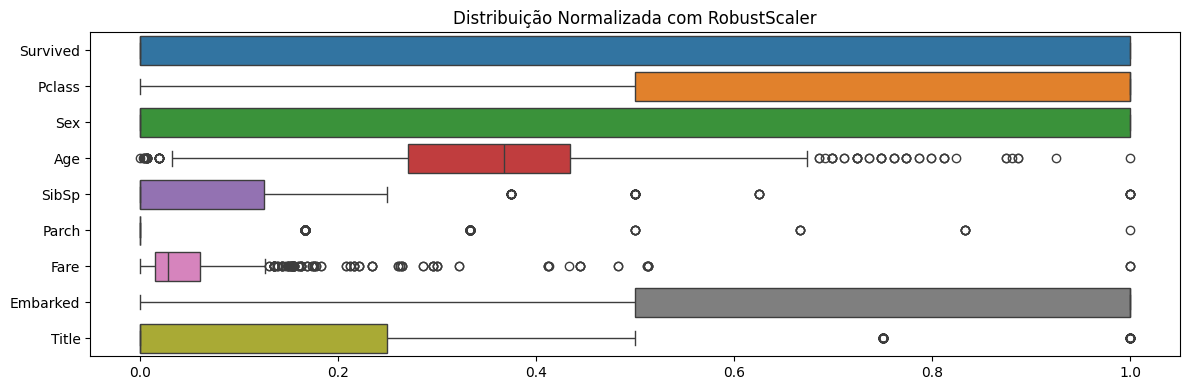

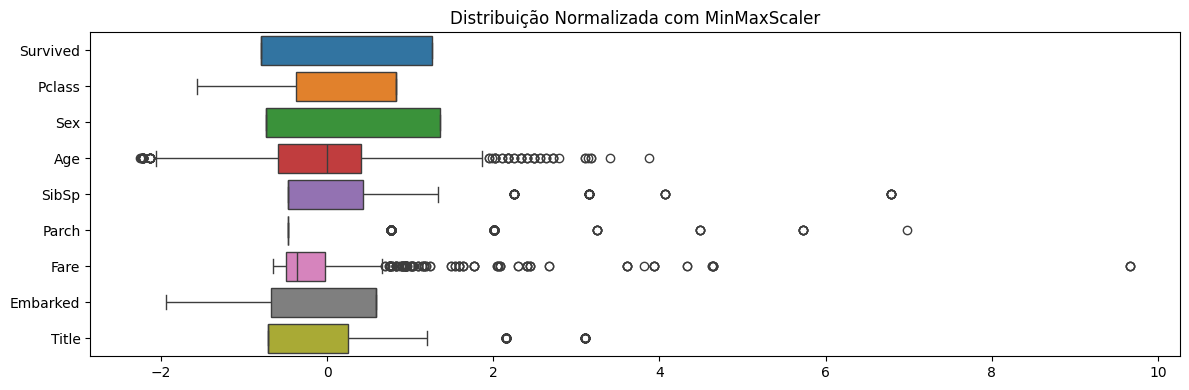

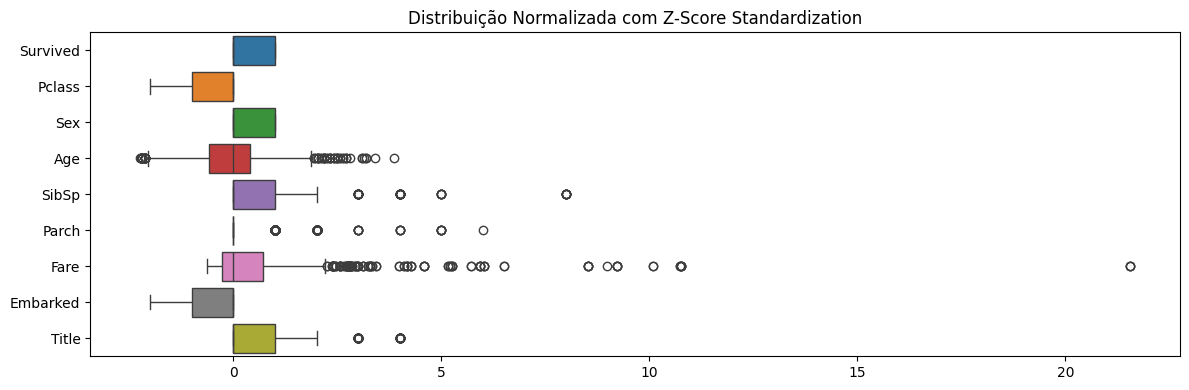

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Instancia um objeto MinMaxScaler, que será usado para a normalização Min-Max
scaler_minmax = MinMaxScaler()

# Instancia um objeto StandardScaler, que será usado para a padronização Z-score
scaler_zscore = StandardScaler()

# Instancia um objeto RobustScaler, que será usado para a normalização robusta a outliers
scaler_robust = RobustScaler()


# === Primeira Aplicação e Visualização dos Scalers (em df_3) ===

# Aplica o MinMaxScaler ao DataFrame df_3 (calcula min/max e transforma)
# O resultado é convertido de volta para um DataFrame do Pandas com as colunas originais
df_3_scaled_minmax = pd.DataFrame(scaler_minmax.fit_transform(df_3), columns=df_3.columns)

# Aplica o StandardScaler ao DataFrame df_3 (calcula média/desvio padrão e transforma)
# O resultado é convertido de volta para um DataFrame do Pandas
df_3_scaled_zscore = pd.DataFrame(scaler_zscore.fit_transform(df_3), columns=df_3.columns)

# Aplica o RobustScaler ao DataFrame df_3 (calcula mediana/IQR e transforma)
# O resultado é convertido de volta para um DataFrame do Pandas
df_3_scaled_robust = pd.DataFrame(scaler_robust.fit_transform(df_3), columns=df_3.columns)

# Configura o tamanho da figura para o primeiro boxplot
plt.figure(figsize=(12, 4))
# Plota um boxplot horizontal dos dados escalonados com MinMaxScaler
sns.boxplot(data=df_3_scaled_minmax, orient='h')
# Define o título do gráfico. ATENÇÃO: O TÍTULO ESTÁ INCORRETO. Deveria ser "MinMaxScaler"
plt.title("Distribuição Normalizada com RobustScaler")
# Ajusta o layout para evitar sobreposição de elementos
plt.tight_layout()

# Configura o tamanho da figura para o segundo boxplot
plt.figure(figsize=(12, 4))
# Plota um boxplot horizontal dos dados escalonados com StandardScaler
sns.boxplot(data=df_3_scaled_zscore, orient='h')
# Define o título do gráfico. ATENÇÃO: O TÍTULO ESTÁ INCORRETO. Deveria ser "StandardScaler"
plt.title("Distribuição Normalizada com MinMaxScaler")
# Ajusta o layout
plt.tight_layout()

# Configura o tamanho da figura para o terceiro boxplot
plt.figure(figsize=(12, 4))
# Plota um boxplot horizontal dos dados escalonados com RobustScaler
sns.boxplot(data=df_3_scaled_robust, orient='h')
# Define o título do gráfico. ATENÇÃO: O TÍTULO ESTÁ INCORRETO. Deveria ser "RobustScaler"
plt.title("Distribuição Normalizada com Z-Score Standardization")
# Ajusta o layout
plt.tight_layout()
# Exibe todos os gráficos criados
plt.show()

In [17]:
# === Tratamento de Outliers na coluna 'Fare' e Separação da Variável Alvo ===

# Cria um novo DataFrame 'df_4' removendo a coluna 'Survived' (variável alvo) de 'df_3'
# 'axis=1' indica que é uma coluna; 'Survived' será o 'Y' para o modelo
df_4 = df_3.drop(['Survived'],axis=1)
# Exibe as primeiras linhas de df_4 para verificar a remoção de 'Survived'
df_4.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,22.0,1,0,7.2500,2,1
1,1,1,38.0,1,0,71.2833,0,3
2,3,1,26.0,0,0,7.9250,2,2
3,1,1,35.0,1,0,53.1000,2,3
4,3,0,35.0,0,0,8.0500,2,1


In [18]:
# Exibe estatísticas descritivas para df_3 (antes da remoção de outliers de Fare)
# Usado para inspecionar a distribuição e identificar outliers em 'Fare'
df_3.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,1.536476,1.740741
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503,1.052077
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,1.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,2.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,5.000000


In [19]:
# Filtra df_4, mantendo apenas as linhas onde 'Fare' é menor ou igual a 300
# Isso remove outliers de tarifa muito alta para melhorar a robustez do modelo
df_4 = df_4[df_4['Fare'] <= 300]
# Exibe estatísticas descritivas para df_4 após a remoção dos outliers de 'Fare'
df_4.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,2.313063,0.352477,29.680083,0.524775,0.381757,30.582164,1.541667,1.742117
std,0.834007,0.478011,13.019819,1.104186,0.806949,41.176366,0.787772,1.053231
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000,1.000000
50%,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,2.000000,1.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,30.771850,2.000000,2.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000,2.000000,5.000000


In [20]:
# Filtra df_3, aplicando a mesma remoção de outliers de 'Fare' para consistência
df_3 = df_3[df_3['Fare'] <= 300]
# Exibe estatísticas descritivas para df_3 após a remoção dos outliers
df_3.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,0.381757,2.313063,0.352477,29.680083,0.524775,0.381757,30.582164,1.541667,1.742117
std,0.486091,0.834007,0.478011,13.019819,1.104186,0.806949,41.176366,0.787772,1.053231
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000,1.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,2.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,30.771850,2.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000,2.000000,5.000000


In [21]:
# Conta o número de passageiros que foram removidos (aqueles com Fare > 300)
contagem = (df_2['Fare'] > 300).sum()
# Imprime a contagem de outliers de 'Fare' removidos
print(f"Número de passageiros com Fare > 300: {contagem}")

Número de passageiros com Fare > 300: 3


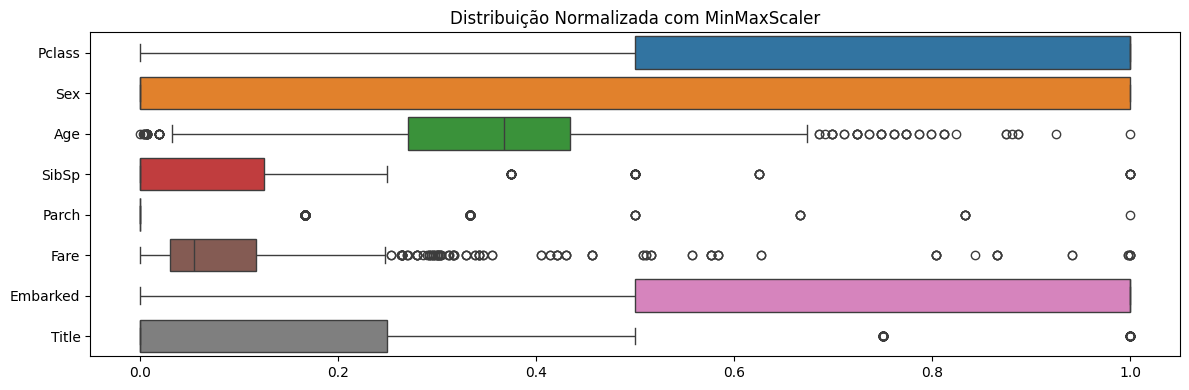

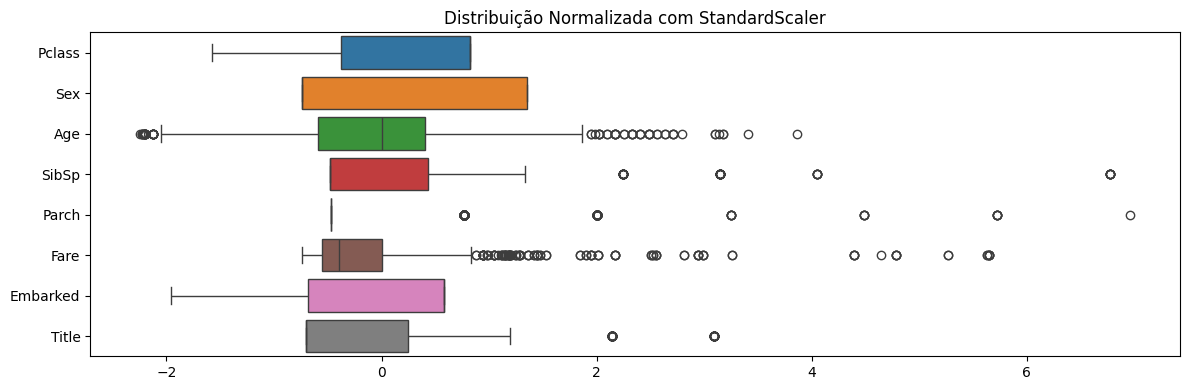

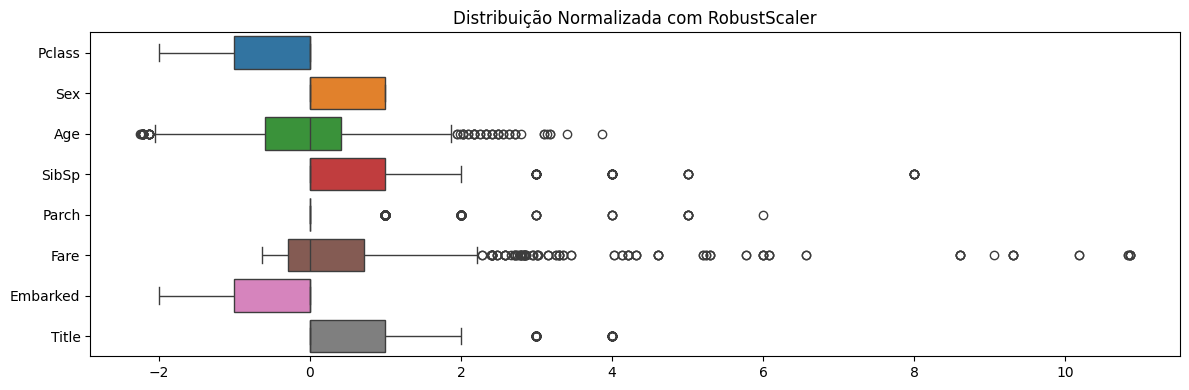

In [22]:
# === Re-instanciação e Aplicação dos Scalers (em df_4, após tratamento de Fare) ===
# As instâncias dos scalers são criadas novamente (opcional, poderiam ser reutilizadas)
scaler_minmax = MinMaxScaler()
scaler_zscore = StandardScaler()
scaler_robust = RobustScaler()

# Aplica o MinMaxScaler aos dados em df_4 (já sem 'Survived' e com outliers de 'Fare' tratados)
df_4_scaled_minmax = pd.DataFrame(scaler_minmax.fit_transform(df_4), columns=df_4.columns)
# Aplica o StandardScaler aos dados em df_4
df_4_scaled_zscore = pd.DataFrame(scaler_zscore.fit_transform(df_4), columns=df_4.columns)
# Aplica o RobustScaler aos dados em df_4
df_4_scaled_robust = pd.DataFrame(scaler_robust.fit_transform(df_4), columns=df_4.columns)

# === Plotagem dos Boxplots para df_4_scaled ===
# Similar aos plots anteriores, mas agora para os dados de df_4 (pós-tratamento de Fare)
plt.figure(figsize=(12, 4))
sns.boxplot(data=df_4_scaled_minmax, orient='h')
plt.title("Distribuição Normalizada com MinMaxScaler")
plt.tight_layout()

plt.figure(figsize=(12, 4))
sns.boxplot(data=df_4_scaled_zscore, orient='h')
plt.title("Distribuição Normalizada com StandardScaler")
plt.tight_layout()

plt.figure(figsize=(12, 4))
sns.boxplot(data=df_4_scaled_robust, orient='h')
plt.title("Distribuição Normalizada com RobustScaler")
plt.tight_layout()
plt.show()

In [23]:
# === Engenharia de Features (em df_5) ===

# Cria df_5 como uma referência para df_4 (alterações em df_5 afetam df_4)
df_5 = df_4
# Cria a feature 'PclassSex' combinando Pclass e Sex para capturar interações
# Ex: 1ª classe masculino = 10, 1ª classe feminino = 11, etc.
df_5['PclassSex'] = df_5['Pclass'] * 10 + df_5['Sex']
# Cria a feature 'FamilySize' somando irmãos/cônjuges e pais/filhos + 1 (o próprio passageiro)
# Representa o tamanho total da família a bordo
df_5['FamilySize'] = df_5['SibSp'] + df_5['Parch'] + 1
# Remove as colunas originais que foram usadas para criar as novas features
# Isso evita redundância e reduz a dimensionalidade do dataset
df_5.drop(['SibSp', 'Parch','Pclass', 'Sex'], axis=1, inplace=True)
# Linha comentada: uma alternativa para remover apenas Pclass e Sex
# df_5.drop(['Pclass', 'Sex'], axis=1, inplace=True)
# Exibe as primeiras linhas de df_5 para verificar as novas features e a remoção das antigas
df_5.head()

,Age,Fare,Embarked,Title,PclassSex,FamilySize
0,22.0,7.2500,2,1,30,2
1,38.0,71.2833,0,3,11,2
2,26.0,7.9250,2,2,31,1
3,35.0,53.1000,2,3,11,2
4,35.0,8.0500,2,1,30,1


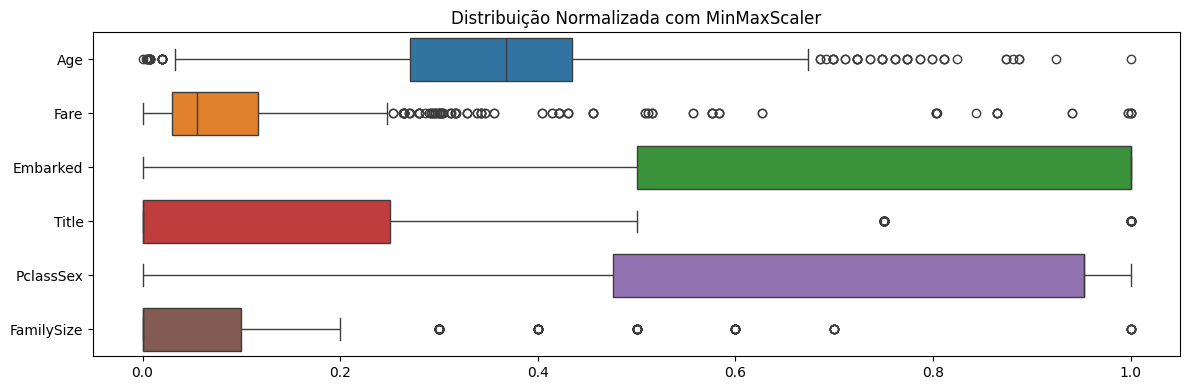

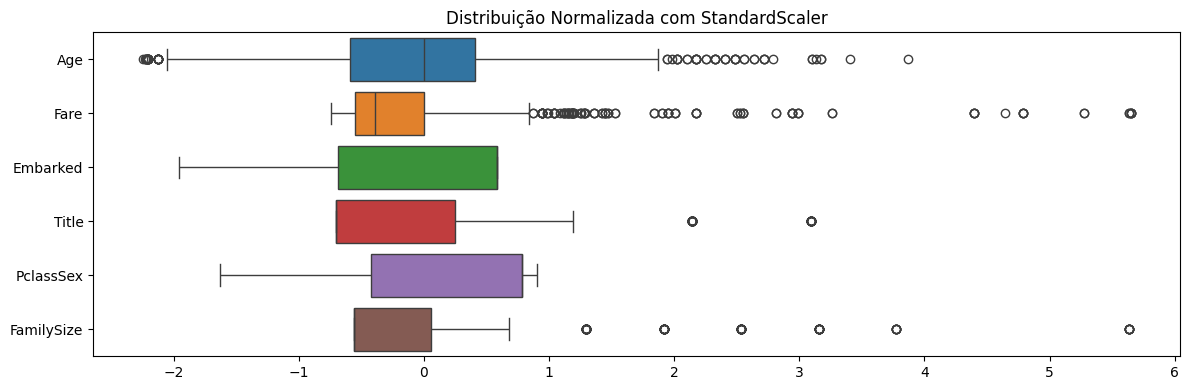

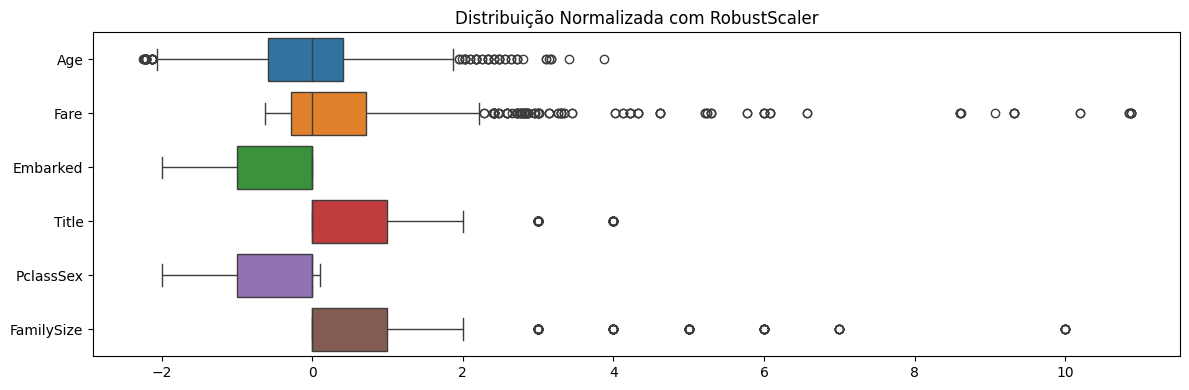

In [24]:
# === Re-re-instanciação e Aplicação dos Scalers (em df_5, após engenharia de features) ===
# As instâncias dos scalers são criadas novamente
scaler_minmax = MinMaxScaler()
scaler_zscore = StandardScaler()
scaler_robust = RobustScaler()


# Aplica o MinMaxScaler aos dados em df_5 (já com novas features)
df_5_scaled_minmax = pd.DataFrame(scaler_minmax.fit_transform(df_5), columns=df_5.columns)

# Aplica o StandardScaler aos dados em df_5
df_5_scaled_zscore = pd.DataFrame(scaler_zscore.fit_transform(df_5), columns=df_5.columns)

# Aplica o RobustScaler aos dados em df_5
df_5_scaled_robust = pd.DataFrame(scaler_robust.fit_transform(df_5), columns=df_5.columns)

# Plotar o boxplot dos dados escalonados
plt.figure(figsize=(12, 4))
sns.boxplot(data=df_5_scaled_minmax, orient='h')
plt.title("Distribuição Normalizada com MinMaxScaler")
plt.tight_layout()

plt.figure(figsize=(12, 4))
sns.boxplot(data=df_5_scaled_zscore, orient='h')
plt.title("Distribuição Normalizada com StandardScaler")
plt.tight_layout()

plt.figure(figsize=(12, 4))
sns.boxplot(data=df_5_scaled_robust, orient='h')
plt.title("Distribuição Normalizada com RobustScaler")
plt.tight_layout()
plt.show()

#Redes Neurais


###Preparação dos Dados

In [81]:
from sklearn.model_selection import train_test_split

# Define variável alvo
Y = df_3["Survived"]

# Seleciona as features (primeiras 888 amostras)
X = df_5.values[0:888]

# Normalização com três tipos de escaladores
scaler_robust = RobustScaler()
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Aplica os escaladores
x_train_robust = scaler_robust.fit_transform(X)
X_train_standard = scaler_standard.fit_transform(X)
X_train_minmax = scaler_minmax.fit_transform(X)

# Divide os dados em treino e teste (80/20), mantendo proporção das classes
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(x_train_robust, Y, test_size=0.2, random_state=42, stratify=Y)
X_train_z, X_test_z, y_train_z, y_test_z = train_test_split(X_train_standard, Y, test_size=0.2, random_state=42, stratify=Y)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_train_minmax, Y, test_size=0.2, random_state=42, stratify=Y)


###Criando a Arquitetura da MLP

In [92]:
import tensorflow as tf
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential
from tensorflow.keras import layers, callbacks


In [142]:

model = Sequential([
    Dense(32, input_shape=(X_train_r.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])



Layer 0 (dense_138):
  Weights shape: (6, 32)
  Bias shape:    (32,)
  Weights: [[ 0.38669553  0.16286626  0.06284791  0.24617341  0.19487998 -0.11263508
   0.389286   -0.17766063 -0.34130222 -0.0344809  -0.09122202  0.13557681
  -0.16459617 -0.31401134 -0.38533226  0.39611998  0.2711176  -0.31077936
  -0.28561583  0.35854104  0.19854066  0.06669343  0.35977045 -0.12001809
   0.11005339 -0.05188408  0.04923671 -0.03137937  0.26095405 -0.36588198
  -0.20766774  0.27421573]
 [-0.3582816   0.20855704 -0.20448104 -0.03391153  0.18995479  0.23885366
   0.02129501  0.2734137   0.05484739  0.12811592  0.35016808 -0.3051905
  -0.24064174 -0.34282967 -0.20619655 -0.01667804 -0.11451921  0.14929864
   0.21259049  0.04173899  0.29038003  0.38891706 -0.33289385 -0.22222857
   0.19589767 -0.2452532   0.21484283 -0.1114766  -0.3836857  -0.07901183
   0.39215586  0.39248285]
 [-0.33920717  0.2056723   0.18366721 -0.16912484  0.20585272  0.12133899
   0.06427485 -0.14403158  0.21907458  0.36161575  0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [153]:
tf.random.set_seed(42)
model1 = Sequential([
    Dense(32, input_shape=(X_train_r.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


###Treinamento do Modelo com Robust

In [144]:
model1.compile(
    loss=tf.keras.losses.binary_crossentropy,  # Função de perda apropriada para classificação binária
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Otimizador eficiente e amplamente usado
    metrics=['acc']  # Métrica de acurácia durante o treino e validação
)

history = model1.fit(
    X_train_r, y_train_r,  # Dados de treino (robust scaler aplicado)
    validation_data=(X_test_r, y_test_r),  # Dados de validação para acompanhar desempenho fora do treino
    epochs=55,  # Número total de passagens pelo conjunto de treino
    batch_size=16,  # Número de amostras por atualização do gradiente
    verbose=2  # Mostra progresso do treino de forma resumida (por época)
)

Epoch 1/55
45/45 - 2s - 38ms/step - acc: 0.5732 - loss: 0.6909 - val_acc: 0.7022 - val_loss: 0.6391
Epoch 2/55
45/45 - 0s - 4ms/step - acc: 0.7310 - loss: 0.6232 - val_acc: 0.7528 - val_loss: 0.5862
Epoch 3/55
45/45 - 0s - 4ms/step - acc: 0.7282 - loss: 0.5715 - val_acc: 0.7753 - val_loss: 0.5313
Epoch 4/55
45/45 - 0s - 6ms/step - acc: 0.7563 - loss: 0.5368 - val_acc: 0.7753 - val_loss: 0.4990
Epoch 5/55
45/45 - 0s - 4ms/step - acc: 0.7577 - loss: 0.5127 - val_acc: 0.7697 - val_loss: 0.4782
Epoch 6/55
45/45 - 0s - 7ms/step - acc: 0.7761 - loss: 0.4977 - val_acc: 0.7921 - val_loss: 0.4717
Epoch 7/55
45/45 - 0s - 7ms/step - acc: 0.7676 - loss: 0.5066 - val_acc: 0.7921 - val_loss: 0.4656
Epoch 8/55
45/45 - 0s - 4ms/step - acc: 0.7789 - loss: 0.4910 - val_acc: 0.7865 - val_loss: 0.4620
Epoch 9/55
45/45 - 0s - 6ms/step - acc: 0.7761 - loss: 0.4826 - val_acc: 0.7921 - val_loss: 0.4598
Epoch 10/55
45/45 - 0s - 4ms/step - acc: 0.7775 - loss: 0.4903 - val_acc: 0.7865 - val_loss: 0.4562
Epoch 11

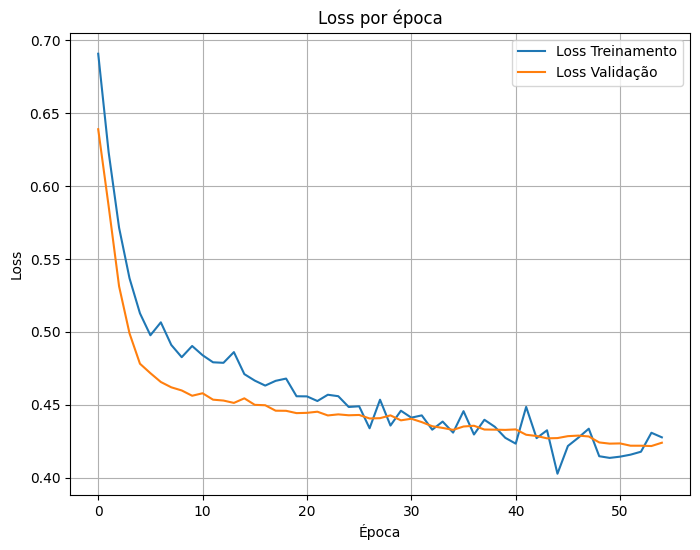

In [145]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Loss Treinamento')
plt.plot(history.history['val_loss'], label='Loss Validação')
plt.title('Loss por época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [146]:
from sklearn import metrics
import numpy as np
Y_pred_rand = (model1.predict(X_train_r) > 0.5).astype(int)
print('Precision : ', np.round(metrics.precision_score(y_train_r, Y_pred_rand)*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(y_train_r, Y_pred_rand)*100,2))
print('Recall : ', np.round(metrics.recall_score(y_train_r, Y_pred_rand)*100,2))
print('F1 score : ', np.round(metrics.f1_score(y_train_r, Y_pred_rand)*100,2))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Precision :  83.98
Accuracy :  83.94
Recall :  71.59
F1 score :  77.29


In [147]:
Y_pred_rand = (model1.predict(X_test_r) > 0.5).astype(int)
print('Precision : ', np.round(metrics.precision_score(y_test_r, Y_pred_rand)*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(y_test_r, Y_pred_rand)*100,2))
print('Recall : ', np.round(metrics.recall_score(y_test_r, Y_pred_rand)*100,2))
print('F1 score : ', np.round(metrics.f1_score(y_test_r, Y_pred_rand)*100,2))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Precision :  81.03
Accuracy :  82.02
Recall :  69.12
F1 score :  74.6


###Treinamento do Modelo com Z-score

In [154]:
model1.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ['acc'])
history = model1.fit(
    X_train_z, y_train_z,
    validation_data=(X_test_z, y_test_z),
    epochs=55,
    batch_size=16,
    verbose=2,
)

Epoch 1/55
45/45 - 2s - 36ms/step - acc: 0.6324 - loss: 0.6501 - val_acc: 0.7135 - val_loss: 0.5773
Epoch 2/55
45/45 - 0s - 4ms/step - acc: 0.7296 - loss: 0.5649 - val_acc: 0.7528 - val_loss: 0.5268
Epoch 3/55
45/45 - 0s - 4ms/step - acc: 0.7465 - loss: 0.5319 - val_acc: 0.7753 - val_loss: 0.5062
Epoch 4/55
45/45 - 0s - 7ms/step - acc: 0.7577 - loss: 0.5197 - val_acc: 0.7809 - val_loss: 0.4943
Epoch 5/55
45/45 - 0s - 7ms/step - acc: 0.7451 - loss: 0.5115 - val_acc: 0.7978 - val_loss: 0.4874
Epoch 6/55
45/45 - 0s - 6ms/step - acc: 0.7817 - loss: 0.4882 - val_acc: 0.7921 - val_loss: 0.4791
Epoch 7/55
45/45 - 0s - 4ms/step - acc: 0.7704 - loss: 0.4846 - val_acc: 0.8090 - val_loss: 0.4741
Epoch 8/55
45/45 - 0s - 7ms/step - acc: 0.7901 - loss: 0.4708 - val_acc: 0.8090 - val_loss: 0.4673
Epoch 9/55
45/45 - 0s - 7ms/step - acc: 0.7944 - loss: 0.4666 - val_acc: 0.7978 - val_loss: 0.4632
Epoch 10/55
45/45 - 0s - 5ms/step - acc: 0.7944 - loss: 0.4697 - val_acc: 0.8034 - val_loss: 0.4566
Epoch 11

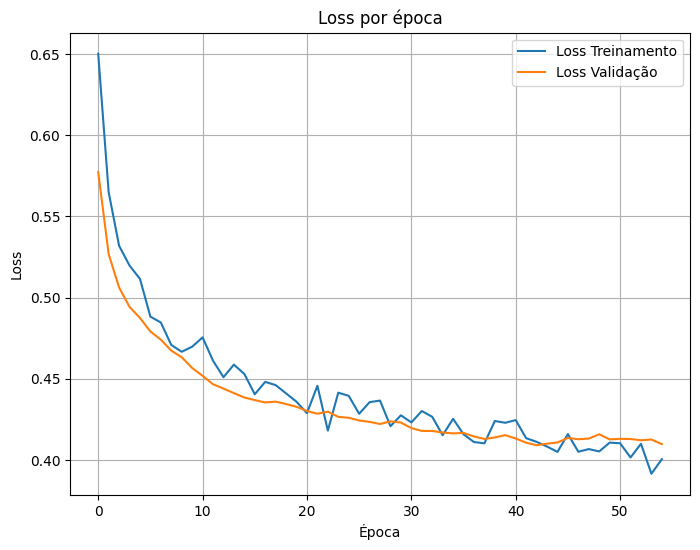

In [155]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Loss Treinamento')
plt.plot(history.history['val_loss'], label='Loss Validação')
plt.title('Loss por época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [156]:
Y_pred_rand = (model1.predict(X_train_z) > 0.5).astype(int)
print('Precision : ', np.round(metrics.precision_score(y_train_z, Y_pred_rand)*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(y_train_z, Y_pred_rand)*100,2))
print('Recall : ', np.round(metrics.recall_score(y_train_z, Y_pred_rand)*100,2))
print('F1 score : ', np.round(metrics.f1_score(y_train_z, Y_pred_rand)*100,2))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Precision :  87.85
Accuracy :  84.65
Recall :  69.37
F1 score :  77.53


In [157]:
Y_pred_rand = (model1.predict(X_test_z) > 0.5).astype(int)
print('Precision : ', np.round(metrics.precision_score(y_test_z, Y_pred_rand)*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(y_test_z, Y_pred_rand)*100,2))
print('Recall : ', np.round(metrics.recall_score(y_test_z, Y_pred_rand)*100,2))
print('F1 score : ', np.round(metrics.f1_score(y_test_z, Y_pred_rand)*100,2))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Precision :  82.46
Accuracy :  82.58
Recall :  69.12
F1 score :  75.2


###Treinamento do Modelo com Min-Max

In [158]:
model1.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ['acc'])
history = model1.fit(
    X_train_m, y_train_m,
    validation_data=(X_test_m, y_test_m),
    epochs=55,
    batch_size=16,
    verbose=2,
)

Epoch 1/55
45/45 - 3s - 59ms/step - acc: 0.7549 - loss: 0.5096 - val_acc: 0.8090 - val_loss: 0.4888
Epoch 2/55
45/45 - 0s - 6ms/step - acc: 0.7789 - loss: 0.4933 - val_acc: 0.7978 - val_loss: 0.4639
Epoch 3/55
45/45 - 0s - 6ms/step - acc: 0.7803 - loss: 0.4814 - val_acc: 0.8034 - val_loss: 0.4479
Epoch 4/55
45/45 - 0s - 7ms/step - acc: 0.8014 - loss: 0.4430 - val_acc: 0.8034 - val_loss: 0.4371
Epoch 5/55
45/45 - 0s - 6ms/step - acc: 0.8141 - loss: 0.4510 - val_acc: 0.8146 - val_loss: 0.4319
Epoch 6/55
45/45 - 0s - 7ms/step - acc: 0.8183 - loss: 0.4415 - val_acc: 0.8146 - val_loss: 0.4279
Epoch 7/55
45/45 - 0s - 7ms/step - acc: 0.8042 - loss: 0.4442 - val_acc: 0.8146 - val_loss: 0.4255
Epoch 8/55
45/45 - 0s - 6ms/step - acc: 0.8197 - loss: 0.4418 - val_acc: 0.8258 - val_loss: 0.4230
Epoch 9/55
45/45 - 0s - 5ms/step - acc: 0.8239 - loss: 0.4340 - val_acc: 0.8146 - val_loss: 0.4180
Epoch 10/55
45/45 - 0s - 4ms/step - acc: 0.8352 - loss: 0.4118 - val_acc: 0.8258 - val_loss: 0.4147
Epoch 11

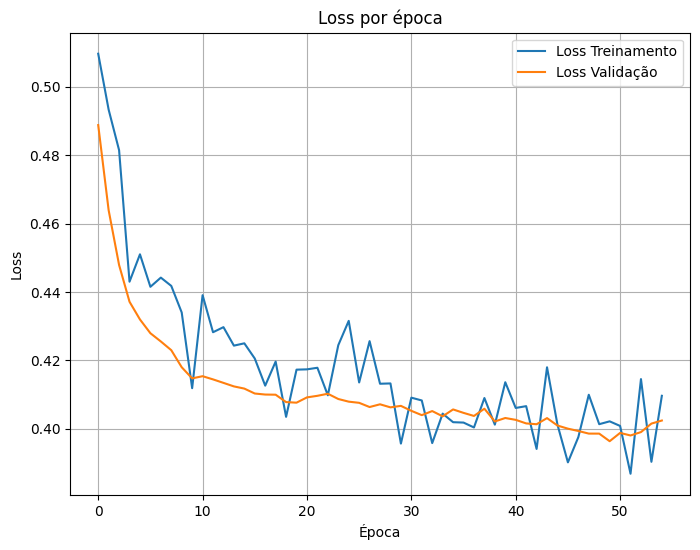

In [159]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Loss Treinamento')
plt.plot(history.history['val_loss'], label='Loss Validação')
plt.title('Loss por época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [161]:
Y_pred_rand = (model1.predict(X_train_m) > 0.5).astype(int)
print('Precision : ', np.round(metrics.precision_score(y_train_m, Y_pred_rand)*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(y_train_m, Y_pred_rand)*100,2))
print('Recall : ', np.round(metrics.recall_score(y_train_m, Y_pred_rand)*100,2))
print('F1 score : ', np.round(metrics.f1_score(y_train_m, Y_pred_rand)*100,2))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Precision :  87.04
Accuracy :  84.37
Recall :  69.37
F1 score :  77.21


In [163]:
Y_pred_rand = (model1.predict(X_test_m) > 0.5).astype(int)
print('Precision : ', np.round(metrics.precision_score(y_test_m, Y_pred_rand)*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(y_test_m, Y_pred_rand)*100,2))
print('Recall : ', np.round(metrics.recall_score(y_test_m, Y_pred_rand)*100,2))
print('F1 score : ', np.round(metrics.f1_score(y_test_m, Y_pred_rand)*100,2))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Precision :  82.46
Accuracy :  82.58
Recall :  69.12
F1 score :  75.2
